In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | zabol
Processing Record 7 of Set 1 | barra patuca
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | warmbad
Processing Record 15 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | sioux lookout
Processing Record 22 of Set 1 | upernavik
Processing Record 23 of Set 1 | bamnet narong

Processing Record 35 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 36 of Set 4 | sun valley
Processing Record 37 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 4 | mikhaylovka
Processing Record 39 of Set 4 | akureyri
Processing Record 40 of Set 4 | mao
Processing Record 41 of Set 4 | lindi
Processing Record 42 of Set 4 | alihe
Processing Record 43 of Set 4 | zelenogorskiy
Processing Record 44 of Set 4 | zile
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | ballina
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | tambongon
Processing Record 50 of Set 4 | geraldton
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | chokurdakh
Processing Record 3 of Set 5 | ivanava
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | ostrovnoy
Processing Record 6 of Set 5 | wetter
Processing Record 7 of Set 5 | kwi

Processing Record 24 of Set 8 | motygino
Processing Record 25 of Set 8 | viedma
Processing Record 26 of Set 8 | neuquen
Processing Record 27 of Set 8 | machaneng
Processing Record 28 of Set 8 | beloha
Processing Record 29 of Set 8 | laranja da terra
Processing Record 30 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 31 of Set 8 | mashivka
Processing Record 32 of Set 8 | trat
Processing Record 33 of Set 8 | adeje
Processing Record 34 of Set 8 | port-cartier
Processing Record 35 of Set 8 | maghama
City not found. Skipping...
Processing Record 36 of Set 8 | dzialdowo
Processing Record 37 of Set 8 | at-bashi
Processing Record 38 of Set 8 | labrea
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | lima
Processing Record 41 of Set 8 | viligili
City not found. Skipping...
Processing Record 42 of Set 8 | roma
Processing Record 43 of Set 8 | tikamgarh
Processing Record 44 of Set 8 | chakia
Processing Record 45 of Set 8 | port hedland
Processing Reco

Processing Record 8 of Set 12 | hofn
Processing Record 9 of Set 12 | baiyin
Processing Record 10 of Set 12 | bulolo
Processing Record 11 of Set 12 | mangrol
Processing Record 12 of Set 12 | magole
Processing Record 13 of Set 12 | praia
Processing Record 14 of Set 12 | pirgos
Processing Record 15 of Set 12 | talaya
Processing Record 16 of Set 12 | northam
Processing Record 17 of Set 12 | raudeberg
Processing Record 18 of Set 12 | penzance
Processing Record 19 of Set 12 | orvieto
Processing Record 20 of Set 12 | nerl
Processing Record 21 of Set 12 | buala
Processing Record 22 of Set 12 | walvis bay
Processing Record 23 of Set 12 | inverell
Processing Record 24 of Set 12 | ilulissat
Processing Record 25 of Set 12 | tsabong
Processing Record 26 of Set 12 | merrill
Processing Record 27 of Set 12 | batavia
Processing Record 28 of Set 12 | taubate
Processing Record 29 of Set 12 | cantagallo
Processing Record 30 of Set 12 | normandin
Processing Record 31 of Set 12 | paamiut
Processing Record 3

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,84.36,79,40,4.61,TO,2022-02-03 06:59:17
1,Bethel,41.3712,-73.4140,39.51,92,100,0.00,US,2022-02-03 06:59:18
2,Iqaluit,63.7506,-68.5145,6.53,84,100,11.99,CA,2022-02-03 06:59:18
3,Lebu,-37.6167,-73.6500,57.15,95,13,8.90,CL,2022-02-03 06:59:19
4,Bredasdorp,-34.5322,20.0403,66.27,60,51,17.09,ZA,2022-02-03 06:59:20
5,Zabol,32.2500,67.2500,38.55,54,4,12.62,AF,2022-02-03 06:59:20
6,Barra Patuca,15.8000,-84.2833,73.72,88,32,6.67,HN,2022-02-03 06:59:21
7,Rikitea,-23.1203,-134.9692,77.58,77,100,10.83,PF,2022-02-03 06:59:21
8,East London,-33.0153,27.9116,72.54,100,40,9.22,ZA,2022-02-03 06:59:22
9,Pevek,69.7008,170.3133,-8.05,76,0,3.89,RU,2022-02-03 06:59:22


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


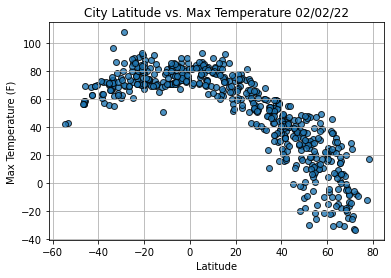

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

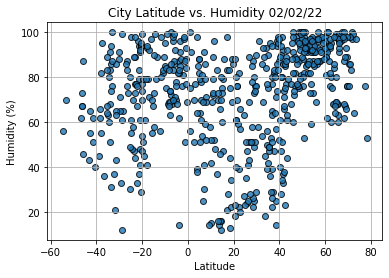

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

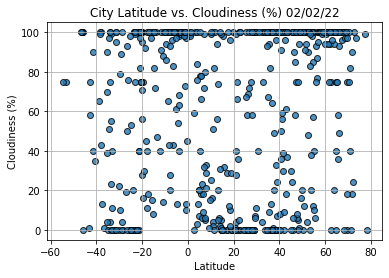

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

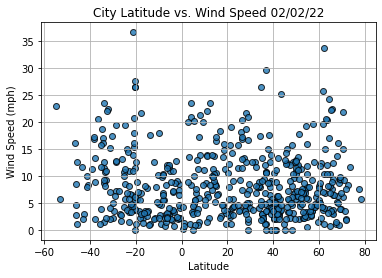

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Lat                        -53.15
Lng                      -70.9167
Max Temp                    42.91
Humidity                       70
Cloudiness                     75
Wind Speed                   5.75
Country                        CL
Date          2022-02-03 06:56:50
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
553     True
554    False
555    False
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bethel,41.3712,-73.4140,39.51,92,100,0.00,US,2022-02-03 06:59:18
2,Iqaluit,63.7506,-68.5145,6.53,84,100,11.99,CA,2022-02-03 06:59:18
5,Zabol,32.2500,67.2500,38.55,54,4,12.62,AF,2022-02-03 06:59:20
6,Barra Patuca,15.8000,-84.2833,73.72,88,32,6.67,HN,2022-02-03 06:59:21
9,Pevek,69.7008,170.3133,-8.05,76,0,3.89,RU,2022-02-03 06:59:22


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

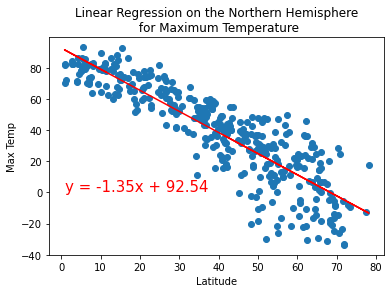

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(1,1))


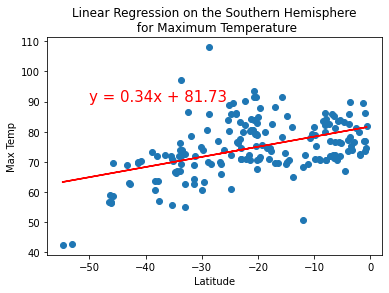

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

In [43]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bethel,41.3712,-73.4140,39.51,92,100,0.00,US,2022-02-03 06:59:18
2,Iqaluit,63.7506,-68.5145,6.53,84,100,11.99,CA,2022-02-03 06:59:18
5,Zabol,32.2500,67.2500,38.55,54,4,12.62,AF,2022-02-03 06:59:20
6,Barra Patuca,15.8000,-84.2833,73.72,88,32,6.67,HN,2022-02-03 06:59:21
9,Pevek,69.7008,170.3133,-8.05,76,0,3.89,RU,2022-02-03 06:59:22


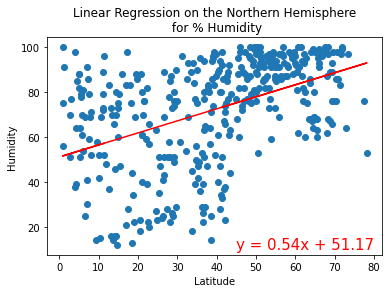

In [68]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\n for % Humidity", 'Humidity',(45,10))

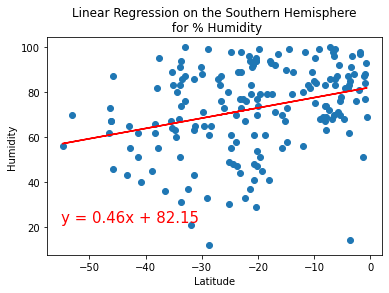

In [79]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\n for % Humidity", 'Humidity',(-55,22))

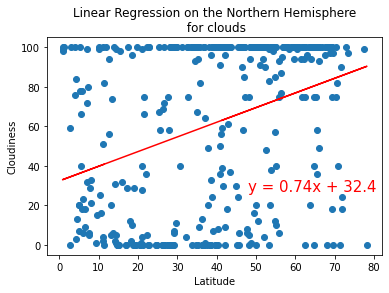

In [87]:
# Linear regression on the Southern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\n for clouds", 'Cloudiness',(48,27))

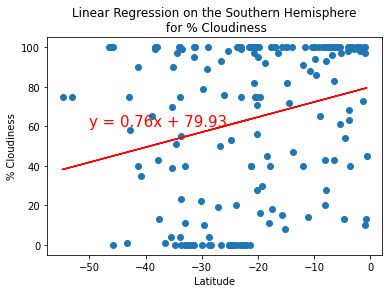

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))
